In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from scipy.signal import find_peaks
import re

In [119]:
#Amin
#DATA_PATH = r"C:\Users\amink\Desktop\Uni\HPI\2.Semester\StatisticsForCH\Studie\statistics_in_ch\Experiment1\Raw_Data"

#Max
DATA_PATH = "/Users/max/Desktop/Potsdam/HPI/2_SecondSemester/7_StatisticsInConnectedHealthcare/statistics_hpi/Raw_Data"

In [120]:

#Load and show raw data
example = pd.read_csv(DATA_PATH + "/" + "140.csv")
example

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,-0.000603,-0.124391,-1.134042,8.660091,8.734913
1,0.009421,-0.186812,-1.051264,9.015003,9.078014
2,0.019446,-0.151335,-1.042283,9.803713,9.860124
3,0.029470,-0.122595,-1.074166,10.438842,10.494679
4,0.039495,-0.069755,-1.146017,10.537487,10.599852
...,...,...,...,...,...
1254,12.570097,-0.170795,-1.445843,10.672806,10.771649
1255,12.580121,-0.143102,-1.463956,10.635683,10.736917
1256,12.590146,0.169448,-1.549428,10.373129,10.489578
1257,12.600170,-0.135169,-1.433120,9.371113,9.481026


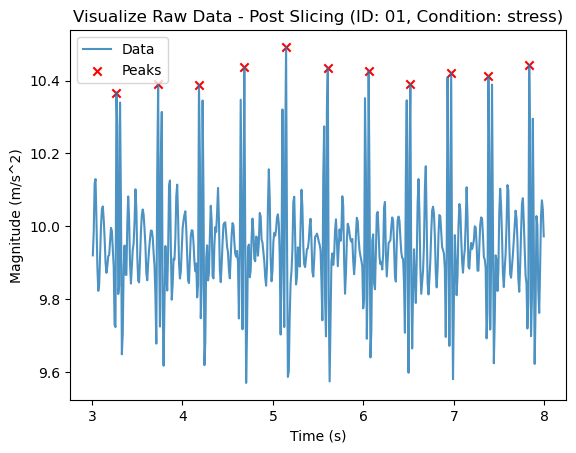

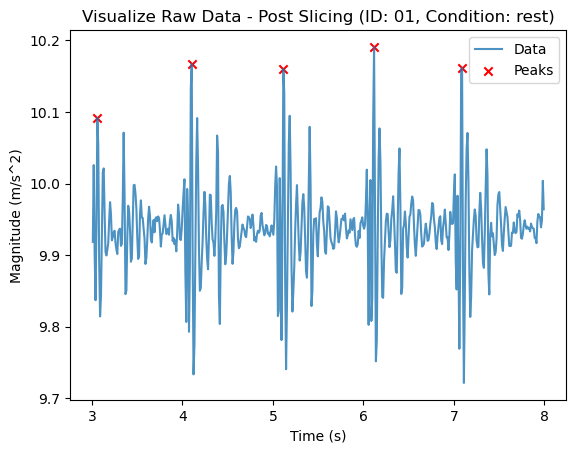

,id,condition,standard deviation,num_peaks,Calc. HR
0,02,stress,0.173513,10.0,120.0
1,14,stress,0.043606,7.0,84.0
2,14,rest,0.047529,5.0,60.0
3,02,rest,0.060579,9.0,108.0
4,22,rest,0.034020,4.0,48.0
5,18,stress,0.052429,7.0,84.0
6,18,rest,0.041958,5.0,60.0
7,22,stress,0.055223,7.0,84.0
8,23,stress,0.057067,6.0,72.0
9,19,rest,0.043716,6.0,72.0


In [121]:
# Create an empty DataFrame to store the final results
final_df = pd.DataFrame()

# Get the list of filenames in the data directory
dir_ = os.listdir(DATA_PATH)

# Iterate over each file in the directory
for filename in dir_:
    # Extract the test person ID and condition from the filename
    test_person_id = filename[:2]
    condition = "rest" if filename[-5] == "0" else "stress"

    # Read the data from the file
    df = pd.read_csv(DATA_PATH + "/" + filename)

    # Slice the data between 3 and 10 seconds
    df = df[(df["Time (s)"] > 3) & (df["Time (s)"] <= 8)].copy()

    # Calculate the magnitude
    df["magnitude"] = np.sqrt(df.iloc[:, 1] ** 2 + df.iloc[:, 2] ** 2 + df.iloc[:, 3] ** 2)

    # Calculate the sampling rate and minimum distance between peaks
    time_diff = df["Time (s)"].diff()
    sampling_rate = 1 / time_diff.mean()
    min_distance = int(0.3 * sampling_rate)

    # Find peaks in the magnitude signal
    peaks, _ = find_peaks(df["magnitude"].values, distance=min_distance)

    # Filter peaks based on the time constraint and distance from mean
    filtered_peaks = [peaks[0]]
    mean = df["magnitude"].mean()
    std = df["magnitude"].std()
    for i in range(1, len(peaks)):
        time_diff = df["Time (s)"].iloc[peaks[i]] - df["Time (s)"].iloc[peaks[i-1]]
        magnitude_diff = np.abs(df["magnitude"].iloc[peaks[i]] - mean)
        if time_diff >= 0.3 and magnitude_diff >= 2 * std:
            filtered_peaks.append(peaks[i])

    # Count the number of peaks
    num_peaks = len(filtered_peaks)

    # Add the features to the final DataFrame
    final_df.loc[len(final_df), "id"] = test_person_id
    final_df.loc[len(final_df) - 1, "condition"] = condition
    final_df.loc[len(final_df) - 1, "standard deviation"] = df.magnitude.std()
    final_df.loc[len(final_df) - 1, "num_peaks"] = num_peaks

    # Visualize the raw data with marked peaks (only for test person with id = "01")
    if test_person_id == "01":
        plt.title(f"Visualize Raw Data - Post Slicing (ID: {test_person_id}, Condition: {condition})")
        plt.xlabel("Time (s)")
        plt.ylabel("Magnitude (m/s^2)")
        plt.plot(df["Time (s)"], df["magnitude"], label="Data", alpha=0.8)
        plt.scatter(df["Time (s)"].iloc[filtered_peaks], df["magnitude"].iloc[filtered_peaks], c='red', marker='x', label="Peaks")
        plt.legend()
        plt.show()

# Calculate the "Calc. HR" column by multiplying the num_peaks with 12
final_df["Calc. HR"] = final_df["num_peaks"] * 12

# Reset the index of the final DataFrame
final_df.reset_index(drop=True, inplace=True)

# Print the final DataFrame
final_df


### Add age, weight, sex

In [122]:
facts = {"01": {"age": 26, "sex": "male", "weight": 88},
        "02": {"age": 24, "sex": "male", "weight": 80}, 
        "03": {"age": 27, "sex": "female", "weight": 65},
        "04": {"age": 21, "sex": "female", "weight": 76},
        "05": {"age": 17, "sex": "male", "weight": 75},
        "06": {"age": 23, "sex": "male", "weight": 90},
        "07": {"age": 24, "sex": "female", "weight": 54},
        "08": {"age": 27, "sex": "female", "weight": 53},
        "09": {"age": 30, "sex": "male", "weight": 76},
        "10": {"age": 19, "sex": "male", "weight": 84},
        "11": {"age": 29, "sex": "female", "weight": 57},
        "12": {"age": 18, "sex": "male", "weight": 80},
        "13": {"age": 19, "sex": "female", "weight": 65},        
        "14": {"age": 35, "sex": "male", "weight": 82},
        "15": {"age": 22, "sex": "male", "weight": 86},
        "16": {"age": 27, "sex": "male", "weight": 91},
        "17": {"age": 19, "sex": "female", "weight": 59},
        "18": {"age": 33, "sex": "female", "weight": 66},
        "19": {"age": 20, "sex": "male", "weight": 83},
        "20": {"age": 27, "sex": "male", "weight": 89},
        "21": {"age": 28, "sex": "female", "weight": 64},
        "22": {"age": 29, "sex": "male", "weight": 84},
        "23": {"age": 21, "sex": "female", "weight": 66},        
        "24": {"age": 28, "sex": "male", "weight": 78},
        "25": {"age": 30, "sex": "male", "weight": 77},
        "26": {"age": 22, "sex": "male", "weight": 92},
        "27": {"age": 28, "sex": "female", "weight": 60},
        "28": {"age": 18, "sex": "female", "weight": 68},
        "29": {"age": 34, "sex": "male", "weight": 82},
        "30": {"age": 30, "sex": "male", "weight": 77},
        }

In [123]:

#Prepare a list of the collected features
age_list = []
sex_list = []
weight_list = []
for i in facts:
    proband = facts[i]
    age_list.append(proband["age"])
    sex_list.append(proband["sex"])
    weight_list.append(proband["weight"])

In [124]:
# Add the further facts to the final df
for i in facts:
    #age
    final_df.loc[final_df["id"] == i, "age"] = facts[i]["age"]
    #sex
    final_df.loc[final_df["id"] == i, "sex"] = facts[i]["sex"]
    #weight
    final_df.loc[final_df["id"] == i, "weight"] = facts[i]["weight"]

In [125]:
final_df

,id,condition,standard deviation,num_peaks,Calc. HR,age,sex,weight
0,02,stress,0.173513,10.0,120.0,24.0,male,80.0
1,14,stress,0.043606,7.0,84.0,35.0,male,82.0
2,14,rest,0.047529,5.0,60.0,35.0,male,82.0
3,02,rest,0.060579,9.0,108.0,24.0,male,80.0
4,22,rest,0.034020,4.0,48.0,29.0,male,84.0
5,18,stress,0.052429,7.0,84.0,33.0,female,66.0
6,18,rest,0.041958,5.0,60.0,33.0,female,66.0
7,22,stress,0.055223,7.0,84.0,29.0,male,84.0
8,23,stress,0.057067,6.0,72.0,21.0,female,66.0
9,19,rest,0.043716,6.0,72.0,20.0,male,83.0


In [126]:
# Export the dataframe to a csv file
final_df = final_df.sort_values(by=['id'])
final_df.to_csv("0_final_df.csv", index = False)
final_df

,id,condition,standard deviation,num_peaks,Calc. HR,age,sex,weight
59,01,rest,0.056915,5.0,60.0,26.0,male,88.0
56,01,stress,0.145124,11.0,132.0,26.0,male,88.0
3,02,rest,0.060579,9.0,108.0,24.0,male,80.0
0,02,stress,0.173513,10.0,120.0,24.0,male,80.0
15,03,stress,0.096989,6.0,72.0,27.0,female,65.0
12,03,rest,0.046022,6.0,72.0,27.0,female,65.0
24,04,rest,0.059405,6.0,72.0,21.0,female,76.0
21,04,stress,0.123385,8.0,96.0,21.0,female,76.0
27,05,rest,0.074433,9.0,108.0,17.0,male,75.0
30,05,stress,0.177847,11.0,132.0,17.0,male,75.0
